In [15]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import torch
os.chdir("/home/gridsan/qwang/urban-control/")
from log_validation import run_controlnet_validation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = pd.read_csv("./data/train/20250416_v4_validation.csv")

In [8]:
df['validation_dir'] = './output/20250416_v1/validation/50000/base_' \
                    + df['city_name'] + '_16+' \
                    + df['x_offset'].astype('int').astype('str') + '+' \
                    + df['y_offset'].astype('int').astype('str') + '_' \
                    + df['x'].astype('int').astype('str') + '_' \
                    + df['y'].astype('int').astype('str') + '.png'

In [9]:
df.groupby('city_name').count()

x    y  x_offset  y_offset  image_column  \
city_name                                               
chicago    608  608       608       608           608   
dallas     545  545       545       545           545   
la         725  725       725       725           725   

           conditioning_image_column  caption  random  llm_caption  \
city_name                                                            
chicago                          608      608     608          608   
dallas                           545      545     545          545   
la                               725      725     725          725   

           validation_dir  
city_name                  
chicago               608  
dallas                545  
la                    725

In [10]:
sample = df.head(10)

In [24]:
import shutil

In [45]:
save = 4
shutil.copy2(sample.iloc[save]['image_column'], "data/segmentation/target_"+"_".join(sample.iloc[save]['validation_dir'].split('/')[-1].split("_")[1:]))
shutil.copy2(sample.iloc[save]['validation_dir'], "data/segmentation/generated_"+"_".join(sample.iloc[save]['validation_dir'].split('/')[-1].split("_")[1:]))
shutil.copy2(sample.iloc[save]['conditioning_image_column'], "data/segmentation/control_"+"_".join(sample.iloc[save]['validation_dir'].split('/')[-1].split("_")[1:]))

'data/segmentation/control_la_16+0+5_11310_26155.png'

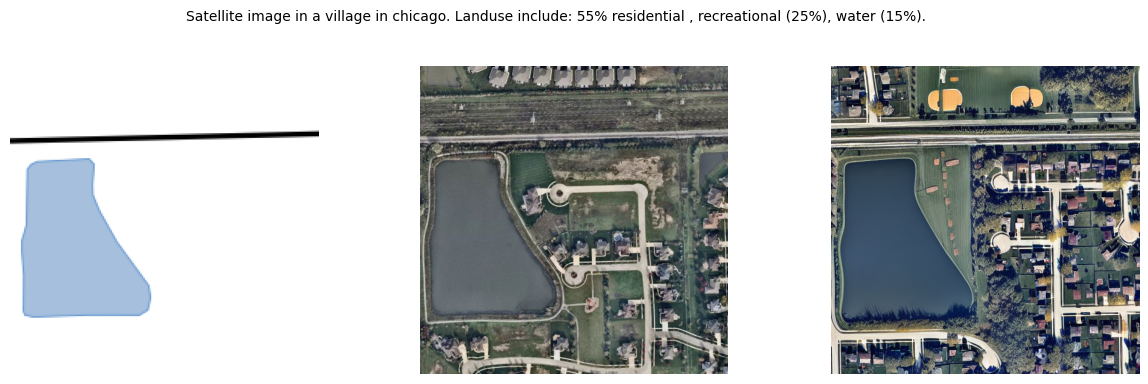

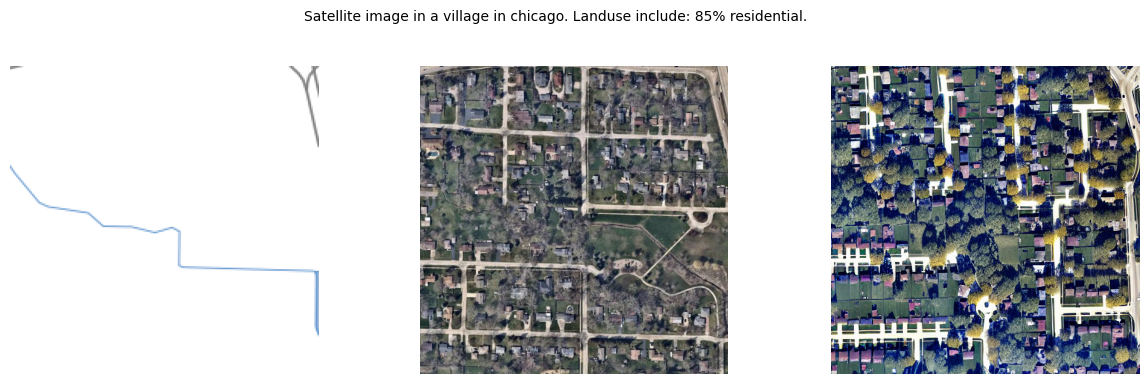

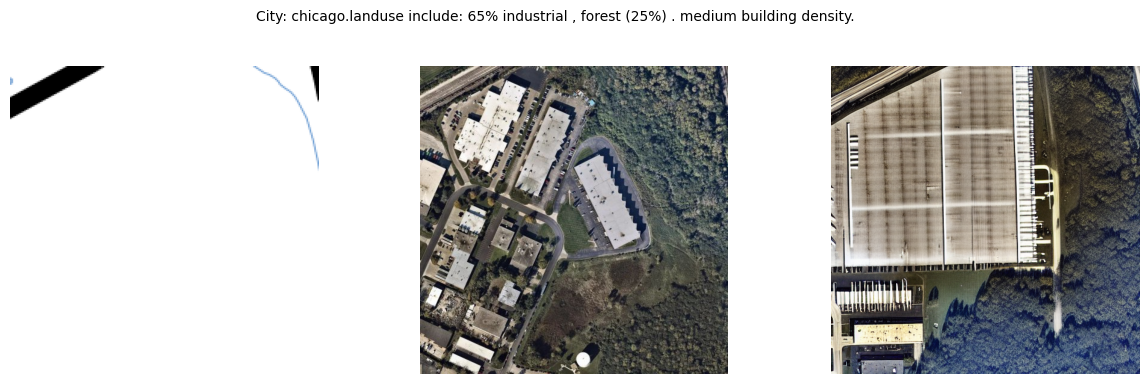

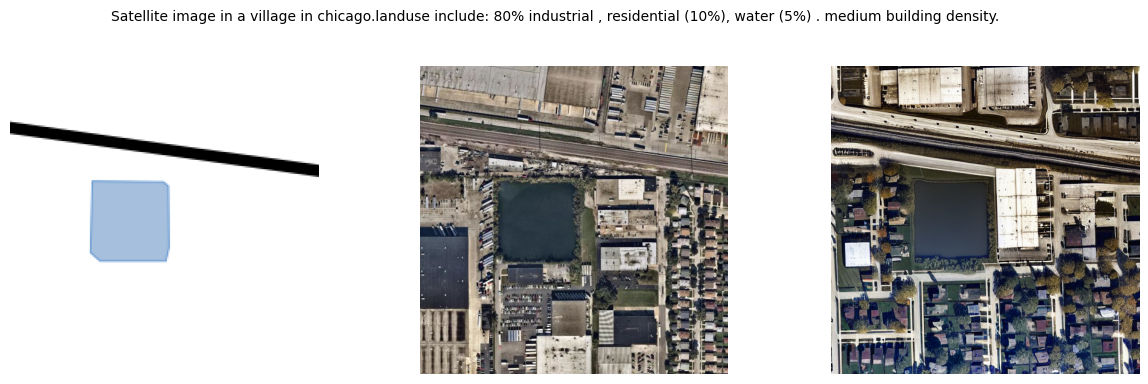

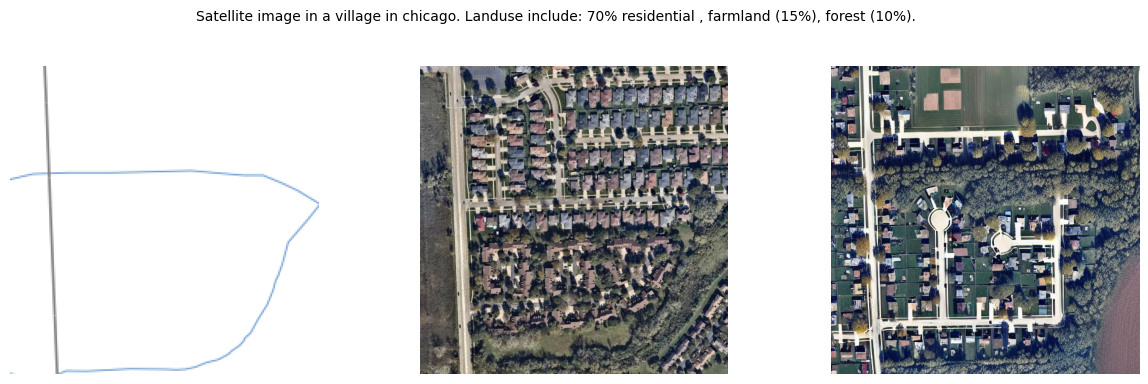

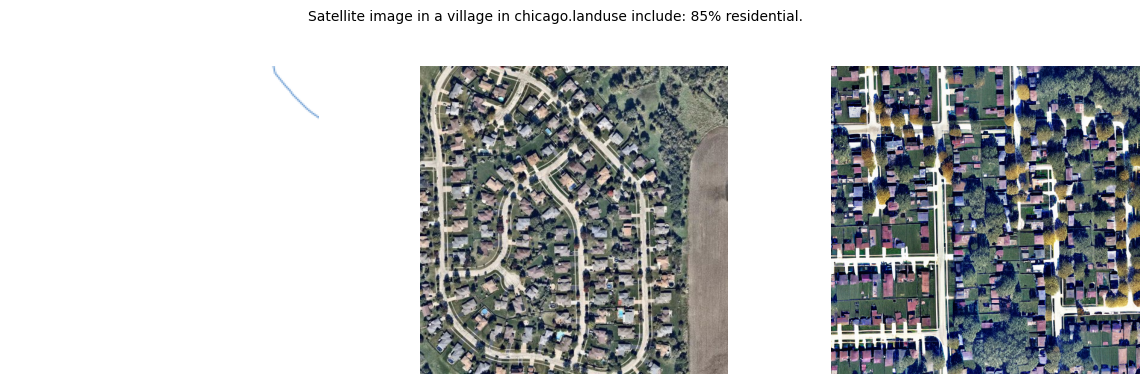

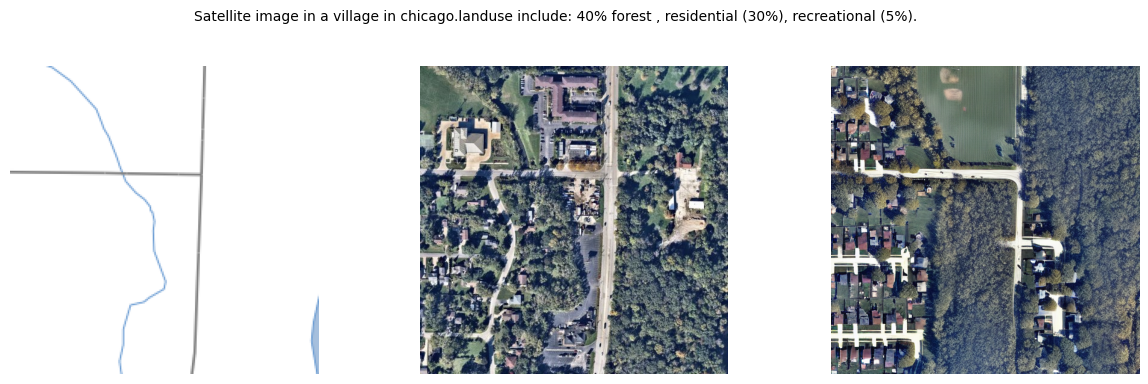

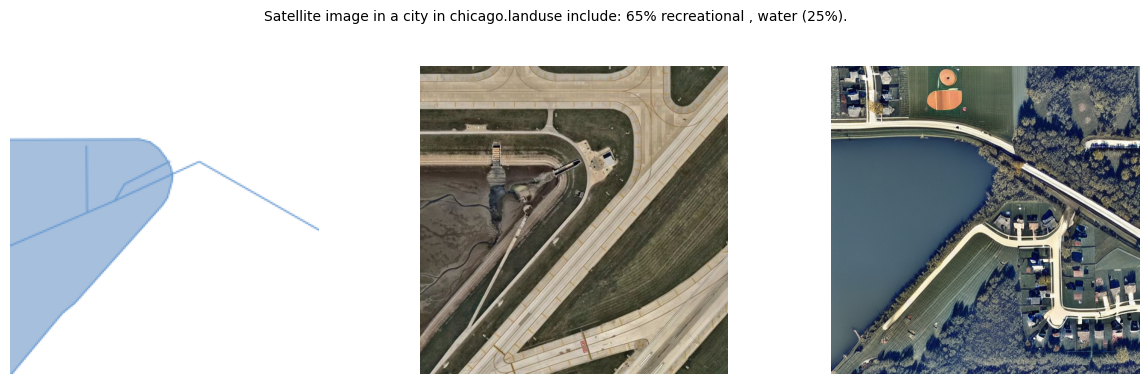

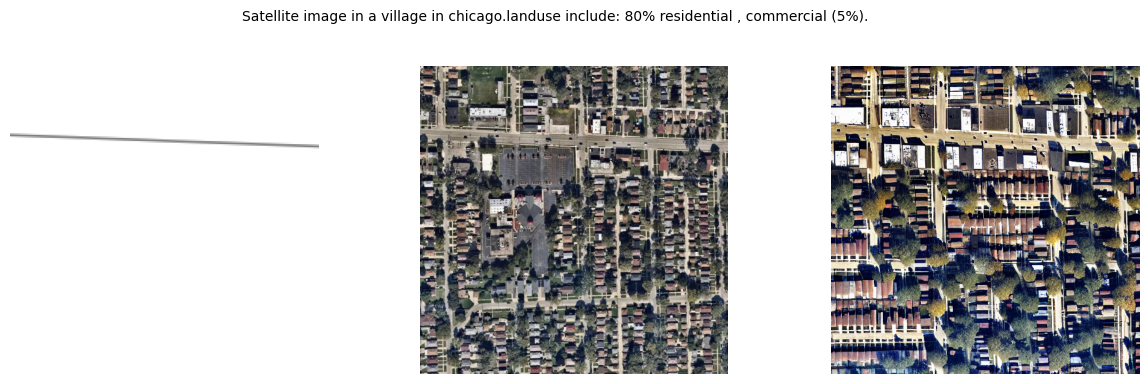

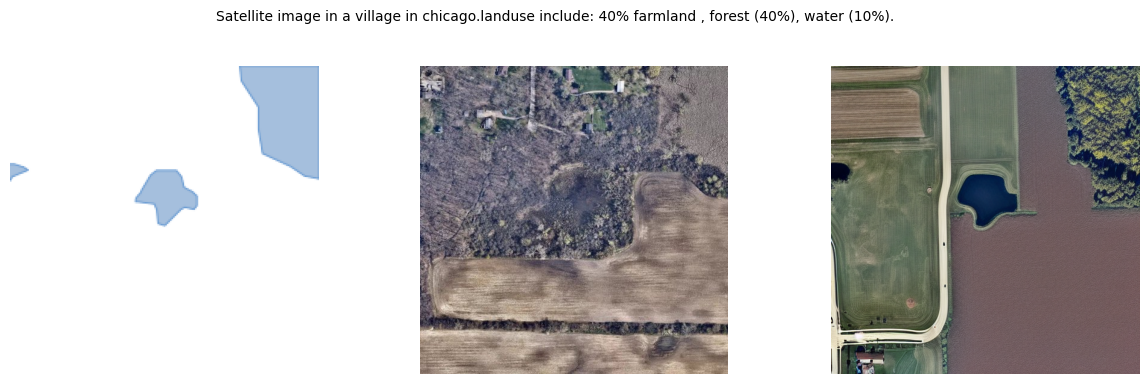

In [11]:
import textwrap
from PIL import Image
import matplotlib.pyplot as plt

for i in range(len(sample)):
    
    target_image = Image.open(sample.iloc[i]['image_column']).convert("RGB")
    generated_image = Image.open(sample.iloc[i]['validation_dir']).convert("RGB")
    control_image = Image.open(sample.iloc[i]['conditioning_image_column']).convert("RGB")

    fig, ax = plt.subplots(1,3, figsize=(15, 4))

    ax[2].imshow(generated_image)
    ax[1].imshow(target_image)
    ax[0].imshow(control_image)
    ax[0].axis('off')
    ax[1].axis('off')    
    ax[2].axis('off')    
    wrapped_title = textwrap.fill(sample.iloc[i]['caption'], width=150)  # Adjust width as needed
    fig.suptitle(wrapped_title, y=1.02, fontsize=10)  # y>1.0 moves title up slightly

In [12]:
idx = 9
model_path = "models/stable-diffusion-v1-5"
controlnet_path = "20250416_v4"
checkpoint = "checkpoint-50000"

control_image_path = sample.loc[idx]['conditioning_image_column']
target_image_path = sample.loc[idx]['image_column']
prompt = sample.loc[idx]['caption']


print(control_image_path)
print(target_image_path)

data/satellite_tiles_control_base/chicago/16+0+0/16768/24217.png
data/satellite_tiles/chicago/16+0+0/16768/24217.png


In [13]:
run_controlnet_validation(
    model_path=model_path,
    controlnet_run=controlnet_path,
    checkpoint=checkpoint,
    prompt=prompt,
    control_image_path=control_image_path,
    target_image_path=target_image_path,
    resolution=512,
    seed=42,
    num_images=3,
    num_steps=30,
    torch_dtype=torch.float16,
)

Loading pipeline components...: 100%|██████████| 6/6 [00:45<00:00,  7.60s/it]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
/home/gridsan/qwang/.conda/envs/control/lib/python3.8/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `vae_latent_channels` directly via 'VaeImageProcessor' object attribute is deprecated. Please access 'vae_latent_channels' o

Saved combined image to output/20250416_v4/log_validation/16+0+0_16768_24217.pngcheckpoint-50000.png


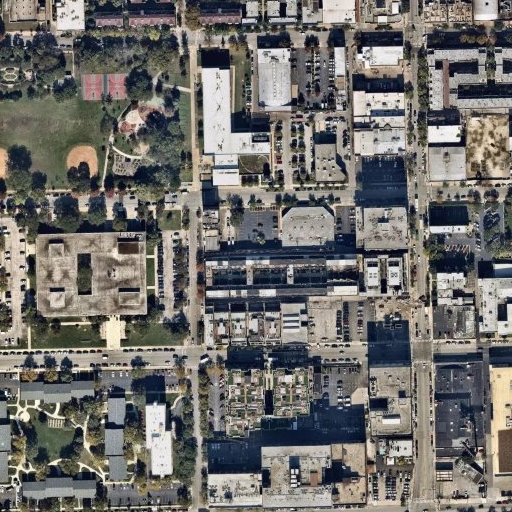

In [16]:
import textwrap
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("data/satellite_tiles/chicago/16+7+3/16809/24357.png")
img